# Solving equations

You will learn about working with matrices and linear algebra (**scipy.linalg**), including solving systems of linear equations. You will learn to find roots of linear and non-linear equations both numerically (**scipy.optimize**) and symbolically (**sympy**).

**Note:** There is a lot of material in this lecture. The important sub-sections are marked with a \*. The algorithms written here is to illustrate the underlying algorithms. The scipy implementations are always both the *fastest* and *safest* choice.

**Links:**

1. **scipy.linalg:** [overview](https://docs.scipy.org/doc/scipy/reference/linalg.html) + [tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
2. **sympy:** [overview](https://docs.sympy.org/latest/index.html) + [tutorial](https://docs.sympy.org/latest/tutorial/index.html#tutorial)
3. **scipy.optimize:** [overview](https://docs.scipy.org/doc/scipy/reference/optimize.html) + [turtorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm

# local module for linear algebra
%load_ext autoreload
%autoreload 2
import numecon_linalg

# Systems of linear equations

## Introduction*

We consider **matrix equations** with $n$ equations and $n$ unknowns:

\\[
\begin{eqnarray*}
Ax = b \Leftrightarrow
\begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}\cdot\begin{bmatrix}x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{bmatrix} & = & \begin{bmatrix}b_{1}\\
b_{2}\\
\vdots\\
b_{n}
\end{bmatrix}
\end{eqnarray*}
\\]

where $A$ is a square parameter matrix, $b$ is a parameter vector, and $x$ is the vector of unknowns.

A specific **example** could be:

\\[
\begin{eqnarray*}
Ax = b \Leftrightarrow
\begin{bmatrix} 
3 & 2 & 0 \\ 
1 & -1 & 0 \\
0 & 5 & 1
\end{bmatrix} \cdot
\begin{bmatrix} 
x_1 \\ 
x_2 \\
x_3
\end{bmatrix} \,=\,
\begin{bmatrix} 
2 \\ 
4 \\
-1
\end{bmatrix} 
\end{eqnarray*}
\\]

**How to solve this?**

In [2]:
A = np.array([[3.0, 2.0, 0.0], [1.0, -1.0, 0], [0.0, 5.0, 1.0]])
b = np.array([2.0, 4.0, -1.0])

Trial-and-error:

In [3]:
Ax = A@[2,-2,9] # @ is matrix multiplication
print('A@x: ',Ax)

if np.allclose(Ax,b): 
    print('solution found')
else:
    print('solution not found')

A@x:  [ 2.  4. -1.]
solution found


**Various matrix operations:**

In [4]:
A.T # transpose

array([[ 3.,  1.,  0.],
       [ 2., -1.,  5.],
       [ 0.,  0.,  1.]])

In [5]:
np.diag(A) # diagonal

array([ 3., -1.,  1.])

In [6]:
np.tril(A) # lower triangular matrix

array([[ 3.,  0.,  0.],
       [ 1., -1.,  0.],
       [ 0.,  5.,  1.]])

In [7]:
np.triu(A) # upper triangular matrix

array([[ 3.,  2.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [8]:
B = A.copy()
np.fill_diagonal(B,0) # fill diagonal with zeros
print(B)

[[0. 2. 0.]
 [1. 0. 0.]
 [0. 5. 0.]]


In [9]:
linalg.inv(A) # inverse

array([[ 0.2,  0.4,  0. ],
       [ 0.2, -0.6,  0. ],
       [-1. ,  3. ,  1. ]])

In [10]:
linalg.eigvals(A) # eigen values

array([ 1.        +0.j, -1.44948974+0.j,  3.44948974+0.j])

## Direct solution with Gauss-Jordan elimination*

Consider the column stacked matrix:

\\[
\begin{eqnarray*}
X=[A\,|\,b]=\begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n} & b_{1}\\
a_{21} & a_{22} & \cdots & a_{2n} & b_{2}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} & b_{n}
\end{bmatrix}
\end{eqnarray*}
\\]

Find the **row reduced echelon form** by performing row operations, i.e.

1. Multiply row with constant
2. Swap rows
3. Add one row to another row,

until the $A$ part of the matrix is the identity matrix.

**Manually:**

In [11]:
# a. stack
X = np.column_stack((A,b))
print('stacked:\n',X)

# b. row operations
X[0,:] += 2*X[1,:]
X[0,:] /= 5.0
X[1,:] -= X[0,:]
X[1,:] *= -1
X[2,:] -= 5*X[1,:]
print('row reduced echelon form:\n',X)

# c. print result (the last column in X in row reduced echelon form)
print('solution',X[:,-1])

stacked:
 [[ 3.  2.  0.  2.]
 [ 1. -1.  0.  4.]
 [ 0.  5.  1. -1.]]
row reduced echelon form:
 [[ 1.  0.  0.  2.]
 [-0.  1. -0. -2.]
 [ 0.  0.  1.  9.]]
solution [ 2. -2.  9.]


**General function:**

In [12]:
Y = np.column_stack((A,b))
numecon_linalg.gauss_jordan(Y)
print('solution',Y[:,-1])

solution [ 2. -2.  9.]


which can also be used to find the inverse if we stack with the identity matrix instead,

In [13]:
# a. construct stacked matrix
Z = np.hstack((A,np.eye(3)))
print('stacked:\n',Z)

# b. apply gauss jordan elimination
numecon_linalg.gauss_jordan(Z)

# b. find inverse
inv_Z = Z[:,3:] # last 3 columns of Z in row reduced echelon form
print('inverse:\n',inv_Z)

assert np.allclose(Z[:,3:]@A,np.eye(3))

stacked:
 [[ 3.  2.  0.  1.  0.  0.]
 [ 1. -1.  0.  0.  1.  0.]
 [ 0.  5.  1.  0.  0.  1.]]
inverse:
 [[ 0.2  0.4  0. ]
 [ 0.2 -0.6  0. ]
 [-1.   3.   1. ]]


## Iteative Gauss-Seidel

We can always decompose $A$ into additive lower and upper triangular matrices,

\\[
\begin{eqnarray*}
A=L+U=\begin{bmatrix}a_{11} & 0 & \cdots & 0\\
a_{21} & a_{22} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}+\begin{bmatrix}0 & a_{12} & \cdots & a_{1n}\\
0 & 0 & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & 0
\end{bmatrix}
\end{eqnarray*}
\\]

such that

\\[
\begin{eqnarray*}
Ax=b\Leftrightarrow Lx=b-Ux
\end{eqnarray*}
\\]

**Algorithm:** `gauss_seidel()`

1. Choose tolerance $\epsilon > 0$, guess on $x_0$, and set $n=1$.
2. Find $x_n$ by solving \\( Lx_n = y \equiv (b-Ux_{n-1}) \\).
3. If $|x_n-x_{n-1}|_{\infty} < \epsilon$ stop, else $n = n +1 $ and return to step 2.

> **Note:** Step 2 is very easy because the equation can be solved directly by *forward substitution*:
>
> \\(x_1 = \frac{y_1}{a_{11}}\\)
>
> \\(x_2 = \frac{(y_2 - a_{21} x_1)}{a_{22}}\\)
>
> \\(x_3 = \frac{(y_3 - a_{31} x_1 - a_{32} x_2)}{a_{33}}\\)
>
> etc.

**Apply Gauss-Seidel:**

In [14]:
x0 = np.array([1,1,1])
x =  numecon_linalg.gauss_seidel(A,b,x0)
print('solution',x)

solution [ 2. -2.  9.]


> **Note:** Convergence is not ensured unless the matrix is *diagonally dominant* or *symmetric* and *positive definite*.

In [15]:
x =  numecon_linalg.gauss_seidel(A,b,x0,do_print=True)

   [1 1 1]
 0 [ 0. -4. 19.]
 1 [ 3.33333333 -0.66666667  2.33333333]
 2 [ 1.11111111 -2.88888889 13.44444444]
 3 [ 2.59259259 -1.40740741  6.03703704]
 4 [ 1.60493827 -2.39506173 10.97530864]
 5 [ 2.26337449 -1.73662551  7.68312757]
 6 [ 1.82441701 -2.17558299  9.87791495]
 7 [ 2.11705533 -1.88294467  8.41472337]
 8 [ 1.92196312 -2.07803688  9.39018442]
 9 [ 2.05202459 -1.94797541  8.73987705]
10 [ 1.96531694 -2.03468306  9.1734153 ]
11 [ 2.02312204 -1.97687796  8.8843898 ]
12 [ 1.98458531 -2.01541469  9.07707347]
13 [ 2.01027646 -1.98972354  8.94861769]
14 [ 1.99314903 -2.00685097  9.03425487]
15 [ 2.00456732 -1.99543268  8.97716342]
16 [ 1.99695512 -2.00304488  9.01522439]
17 [ 2.00202992 -1.99797008  8.98985041]
18 [ 1.99864672 -2.00135328  9.00676639]
19 [ 2.00090219 -1.99909781  8.99548907]
20 [ 1.99939854 -2.00060146  9.00300729]
21 [ 2.00040097 -1.99959903  8.99799514]
22 [ 1.99973269 -2.00026731  9.00133657]
23 [ 2.00017821 -1.99982179  8.99910895]
24 [ 1.99988119 -2.00011881  

## Scipy functions*

**Option 1:** Use `.solve()` (scipy chooses what happens).

In [16]:
x1 = linalg.solve(A, b)
print(x1)
assert np.all(A@x1 == b)

[ 2. -2.  9.]


**Option 2:** Compute `.inv()` first and then solve.

In [17]:
Ainv = linalg.inv(A)
x2 = Ainv@b
print(x2)

[ 2. -2.  9.]


> **Note:** Computing the inverse is normally not a good idea due to numerical stability.

**Option 3:** Compute LU decomposition and then solve.

In [18]:
LU,piv = linalg.lu_factor(A) # decomposition (factorization)
x3 = linalg.lu_solve((LU,piv),b)
print(x3)

[ 2. -2.  9.]


**Detail:** `piv` contains information on a numerical stable reordering.

## Comparisons*

1. `linalg.solve()` is the best choice for solving once.
2. `linalg.lu_solve()` is the best choice when solving for multipe $b$'s for a fixed $A$ (the LU decomposition only needs to be done once).
3. Gauss-Seidel is an alternative when e.g. only an approximate solution is needed.

## Details on LU factorization

When $A$ is *regular* (invertible), we can decompose it into a *lower unit triangular matrix*, $L$, and an *upper triangular matrix*, $U$:

\\[
\begin{eqnarray*}
A= L\cdot U = \begin{bmatrix}1 & 0 & \cdots & 0\\
l_{21} & 1 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
l_{n1} & l_{n2} & \cdots & 1
\end{bmatrix}\cdot\begin{bmatrix}u_{11} & u_{12} & \cdots & u_{1n}\\
0 & u_{22} & \cdots & u_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & u_{nn}
\end{bmatrix}
\end{eqnarray*}
\\]

where it can be shown that we can compute the elements by

\\[
\begin{eqnarray*}
u_{ij} = a_{ij} - \sum_{k=1}^{i-1} u_{kj} l_{ik} \\
l_{ij} = \frac{1}{u_{jj}} \big( a_{ij} - \sum_{k=1}^{j-1} u_{kj} l_{ik} \big)
\end{eqnarray*}
\\]

This implies that the equation system can be written

\\[ L(Ux) = b \\]

**Algorithm:** `lu_solve()`

1. Perform LU decomposition (factorization)
2. Solve $Ly = b$ for $y$ (by *forward substitution*) where $y = Ux$
3. Solve $Ux = y$ for $x$ (by *backward substitution*)

In [19]:
L,U = numecon_linalg.lu_decomposition(A) # step 1
y = numecon_linalg.solve_with_forward_substitution(L,b) # step 2
x = numecon_linalg.solve_with_backward_substitution(U,y) # step 3
print('L:\n',L)
print('\nU:\n',U)
print('\nsolution:',x)

L:
 [[ 1.          0.          0.        ]
 [ 0.33333333  1.          0.        ]
 [ 0.         -3.          1.        ]]

U:
 [[ 3.          2.          0.        ]
 [ 0.         -1.66666667  0.        ]
 [ 0.          0.          1.        ]]

solution: [ 2. -2.  9.]


**Relation to scipy:**

1. Scipy use pivoting to improve numerical stability.
2. Scipy is implemented much much better than here.

## Sparse matrices (not covered)

**Sparse matrix:** A matrix with many zeros. Letting the computer know where they are is extremely valuable.

**Documentation:** [basics](https://docs.scipy.org/doc/scipy/reference/sparse.html) + [linear algebra](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg)

**Create a sparse matrix**, where most elements are on the diagonal:

In [20]:
from scipy import sparse
import scipy.sparse.linalg

S = sparse.lil_matrix((1000, 1000)) # 1000x1000 matrix with zeroes
S.setdiag(np.random.rand(1000)) # some values on the diagonal
S[200, :100] = np.random.rand(100) # some values in a row
S[200:210, 100:200] = S[200, :100] # and the same value in some other rows

Create a plot of the values in the matrix:

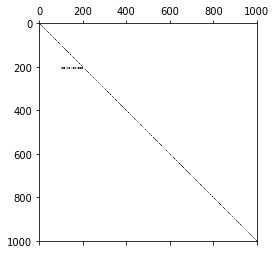

In [21]:
S_np = S.toarray() # conversion to numpy
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.matshow(S_np,cmap=plt.cm.binary);

**Solve it in four different ways:**

1. Like it was not sparse
2. Using the sparsity
3. Using the sparsity + explicit factorization
4. Iterative solver (similar to Gauss-Seidel)

In [22]:
k = np.random.rand(1000) # random RHS

# a. solve
t0 = time.time()
x = linalg.solve(S_np,k)
print(f'{"solve":12s}: {time.time()-t0:.5f} secs')

# b. solve with spsolve
t0 = time.time()
x_alt = sparse.linalg.spsolve(S.tocsr(), k)
print(f'{"spsolve":12s}: {time.time()-t0:.5f} secs')
assert np.allclose(x,x_alt)
      
# c. solve with explicit factorization
t0 = time.time()
S_solver = sparse.linalg.factorized(S.tocsc())
x_alt = S_solver(k)
print(f'{"factorized":12s}: {time.time()-t0:.5f} secs')
assert np.allclose(x,x_alt)
      
# d. solve with iterative solver (bicgstab)
t0 = time.time()
x_alt,_info = sparse.linalg.bicgstab(S,k,x0=1.001*x,tol=10**(-8))
print(f'{"bicgstab":12s}: {time.time()-t0:.5f} secs')
assert np.allclose(x,x_alt),x-x_alt

solve       : 0.05542 secs
spsolve     : 0.00201 secs
factorized  : 0.00100 secs
bicgstab    : 0.17293 secs


**Conclusion:** 

1. Using the sparsity can be very important.
2. Iterative solvers can be very very slow.

# Symbolically

In [23]:
sm.init_printing(use_unicode=True) # for pretty printing

## Solve consumer problem*

Consider solving the following problem:

\\[ \max_{x_1,x_2} x_1^{\alpha} x_2^{\beta} \text{ s.t. } p_1x_1 + p_2x_2 = I \\]

Define all symbols:

In [24]:
x1 = sm.symbols('x_1') # x1 is a Python variable representing the symbol x_1
x2 = sm.symbols('x_2')
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')

Define objective and budget constraint:

In [25]:
objective = x1**alpha*x2**beta
objective

In [26]:
budget_constraint = sm.Eq(p1*x1+p2*x2,I)
budget_constraint

Solve in **four steps**:

1. **Isolate** $x_2$ from the budget constraint
2. **Substitute** in $x_2$
3. **Take the derivative** wrt. $x_1$
4. **Solve the FOC** for $x_1$

**Step 1: Isolate**

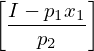

In [27]:
x2_from_con = sm.solve(budget_constraint,x2)
x2_from_con

**Step 2: Substitute**

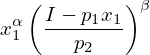

In [28]:
objective_subs = objective.subs(x2,x2_from_con[0])
objective_subs

**Step 3: Take the derivative**

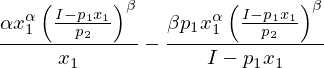

In [29]:
foc = sm.diff(objective_subs,x1)
foc

**Step 4: Solve the FOC**

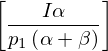

In [30]:
sol = sm.solve(foc,x1)
sol

> An alternative is `sm.solveset()`, which will be the default in the future, but it is still a bit immature in my view.

**Task:** Solve the consumer problem with quasi-linear preferences,

\\[ \max_{x_1,x_2} \sqrt{x_1} + \gamma x_2 \text{ s.t. } p_1x_1 + p_2x_2 = I \\]

In [31]:
# write your code here

## Use solution*

**LaTex:** Print in LaTex format:

In [32]:
print(sm.latex(sol[0]))

\frac{I \alpha}{p_{1} \left(\alpha + \beta\right)}


**Turn into Python function:**

In [33]:
_sol_func = sm.lambdify((p1,I,alpha,beta),sol[0])
def sol_func(p1,I=10,alpha=1,beta=1):
    return _sol_func(p1,I,alpha,beta)
    
# test
p1_vec = np.array([1.2,3,5,9])
demand_p1 = sol_func(p1_vec)
print(demand_p1)

[4.16666667 1.66666667 1.         0.55555556]


**Is demand always positive?**

Give the computer the **information** we have. I.e. that $p_1$, $p_2$, $\alpha$, $\beta$, $I$ are all strictly positive:

In [34]:
for var in [p1,p2,alpha,beta,I]:
    sm.assume.global_assumptions.add(sm.Q.positive(var))
sm.assume.global_assumptions    

**Ask** the computer a **question**:

In [35]:
answer = sm.ask(sm.Q.positive(sol[0]))
print(answer)

True


We need the assumption that $p_1 > 0$:

In [36]:
sm.assume.global_assumptions.remove(sm.Q.positive(p1))
answer = sm.ask(sm.Q.positive(sol[0]))
print(answer)

None


To clear all assumptions we can use:

In [37]:
sm.assume.global_assumptions.clear()

## Solving matrix equations

\\[ Ax = b \\]

**Remember:**

In [38]:
print('A:\n',A)
print('b:',b)

A:
 [[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]
b: [ 2.  4. -1.]


**Construct symbolic matrix:**

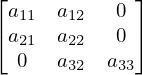

In [39]:
A_sm = numecon_linalg.construct_sympy_matrix(['11','12','21','22','32','33']) # somewhat complicated function
A_sm

**Find the inverse symbolically:**

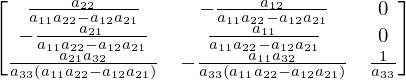

In [40]:
A_sm_inv = A_sm.inv()
A_sm_inv

**Fill in the numeric values:**

In [41]:
A_num = numecon_linalg.fill_sympy_matrix(A_sm_inv,A) # somewhat complicated function
x = A_num@b
print('solution:',x)

solution: [ 2. -2.  9.]


**Note:** The inverse multiplied by the determinant looks nicer...

In [42]:
A_sm_det = A_sm.det()
A_sm_det

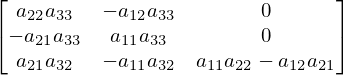

In [43]:
A_sm_inv_raw = sm.simplify(A_sm_inv*A_sm_det)
A_sm_inv_raw

## More features (mixed goodies)*

In [44]:
x = sm.symbols('x')

**Derivatives:** Higher order derivatives are also availible

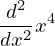

In [45]:
sm.Derivative('x**4',x,x)

In [46]:
sm.diff('x**4',x,x)

Alternatively,

In [47]:
expr = sm.Derivative('x**4',x,x)
expr.doit()

**Integrals:**

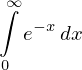

In [48]:
sm.Integral(sm.exp(-x), (x, 0, sm.oo))

In [49]:
sm.integrate(sm.exp(-x), (x, 0, sm.oo))

**Limits:**

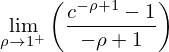

In [50]:
c = sm.symbols('c')
rho = sm.symbols('rho')
sm.Limit((c**(1-rho)-1)/(1-rho),rho,1)

In [51]:
sm.limit((c**(1-rho)-1)/(1-rho),rho,1)

**Integers:**

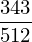

In [52]:
X = sm.Integer(7)/sm.Integer(3)
Y = sm.Integer(3)/sm.Integer(8)
Z = 3
sm.simplify((X*Y)**Z)

**Simplify:**

In [53]:
expr = sm.sin(x)**2 + sm.cos(x)**2
expr

In [54]:
sm.simplify(expr)

**Solve multiple equations at once:**

In [55]:
x = sm.symbols('x')
y = sm.symbols('y')
Eq1 = sm.Eq(x**2+y-2,0)
Eq2 = sm.Eq(y**2-4,0)
sol = sm.solve([Eq1,Eq2], [x,y])

# print all solutions
for xy in sol:
    print(f'(x,y) = ({xy[0]},{xy[1]})')

(x,y) = (-2,-2)
(x,y) = (0,2)
(x,y) = (0,2)
(x,y) = (2,-2)


## Stop pretty printing

In [56]:
sm.init_printing(pretty_print=False)

# Non-linear equations - one dimensional

## Introduction*

We consider **solving non-linear equations** on the form,

\\[ f(x) = 0, x \in \mathbb{R} \\]

This is also called **root-finding**.

A specific **example** is:

\\[ f(x) = 10x^3 - x^2 -1 \\]

## Derivative based methods*

**Newton methods:** Assume you know the function value and derivatives at $x_0$. 

A **first order** approximate value of the function at $x_1$ then is:

\\[ f(x_1) \approx f(x_0) + f^{\prime}(x_0)(x_1-x_0)\\]

implying 

\\[ f(x_1) = 0 \Leftrightarrow x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)} \\]

This is called **Newtons method**.

An alternative is **Halleys method**, which uses

\\[ x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)} \Big[ 1-\frac{f(x_0)}{f^{\prime}(x_0)}\frac{f^{\prime\prime}(x_0)}{2f^{\prime}(x_0)} \Big]^{-1} \\]

making use of information from the **second derivative**.



**Algorithm:** `find_root()`

1. Choose tolerance $\epsilon > 0$, guess on $x_0$ and set $n = 0$.
2. Calculate $f(x_n)$, $f^{\prime}(x_n)$, and perhaps $f^{\prime\prime}(x_n)$.
3. If $f(x_n) < \epsilon$ stop.
4. Calculate $x_{n+1}$ using Newtons or Halleys formula (see above).
5. Set $n = n + 1$ and return to step 2.

In [57]:
def find_root(x0,f,fp,fpp=None,method='newton',max_iter=500,tol=1e-8,full_info=False):
    """ find root
        
    Args:
    
        x0 (float): initial value
        f (callable): function
        fp (callable): derivative
        fp (callable): second derivative
        method (str): newton or halley
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        full_info (bool): controls information returned
        
    Returns:
    
        x (float/ndarray): root (if full_info, all x tried)
        i (int): number of iterations used
        fx (ndarray): function values used (if full_info) 
        fpx (ndarray): derivative values used (if full_info)
        fppx (ndarray): second derivative values used (if full_info)
        
    """
    
    # initialize
    x = np.zeros(max_iter)
    fx = np.zeros(max_iter)
    fpx = np.zeros(max_iter)
    fppx = np.zeros(max_iter)
    x[0] = x0
    i = 0
    
    # iterate
    while True:
        
        # step 2: evaluate function and derivatives
        fx[i] = f(x[i])
        fpx[i] = fp(x[i])
        if method == 'halley':
            fppx[i] = fpp(x[i])
        
        # step 3: check convergence
        if abs(fx[i]) < tol or i >= max_iter:
            break
            
        # step 4: update x
        if method == 'newton':
            x[i+1] = x[i] - fx[i]/fpx[i]
        elif method == 'halley':
            a = fx[i]/fpx[i]
            b = a*fppx[i]/(2*fpx[i])
            x[i+1] = x[i] - a/(1-b)
        
        # step 5: increment counter
        i += 1
        
    # return
    if full_info:
        return x,i,fx,fpx,fppx
    else:
        return x[i],i

**Note:** The cell below contains a function for plotting the convergence.

In [58]:
def plot_find_root(x0,f,fp,fpp=None,method='newton',xmin=-8,xmax=8,xn=100):
    
    # a. find root and return all information 
    x,max_iter,fx,fpx,fppx = find_root(x0,f,fp,fpp=fpp,method=method,full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin,xmax,xn)
    fxvec = f(xvec)
    
    # c. figure
    def _figure(i):
        
        # i. approximation
        if method == 'newton':
            fapprox = fx[i] + fpx[i]*(xvec-x[i])
        elif method == 'halley':
            fapprox = fx[i] + fpx[i]*(xvec-x[i]) + fppx[i]*(xvec-x[i])**2  
            
        # ii. figure
        fig = plt.figure(dpi=100)
        ax = fig.add_subplot(1,1,1)
        
        ax.plot(xvec,fxvec,label='function') # on grid
        ax.plot(x[i],fx[i],'o',color='black',label='current') # now
        
        if i < max_iter:            
            ax.plot(xvec,fapprox,label='approximation') # approximation
            ax.axvline(x[i+1],ls='--',lw=1,color='black') # cross zero
            ax.plot(x[i+1],fx[i+1],'o',color='black',mfc='none',label='next')# next
            
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_ylim([fxvec[0],fxvec[-1]])
    
    widgets.interact(_figure,
        i=widgets.IntSlider(description="iterations", min=0, max=max_iter, step=1, value=0)
    );

## Example*

In [59]:
f = lambda x: 10*x**3 - x**2 -1
fp = lambda x: 30*x**2 - 2*x
fpp = lambda x: 60*x - 2

In [60]:
x,i = find_root(-5,f,fp,method='newton')
print(i,x,f(x))

17 0.5000000000000073 4.773959005888173e-14


In [61]:
x,i = find_root(-5,f,fp,fpp,method='halley')
print(i,x,f(x))

12 0.4999999999675154 -2.1114998638438465e-10


In [62]:
plot_find_root(-5,f,fp,method='newton')

interactive(children=(IntSlider(value=0, description='iterations', max=17), Output()), _dom_classes=('widget-i…

In [63]:
plot_find_root(-5,f,fp,fpp,method='halley')

interactive(children=(IntSlider(value=0, description='iterations', max=12), Output()), _dom_classes=('widget-i…

## Numerical derivative*

Sometimes, you might not have the **analytical derivative**. Then, you can instead use the **numerical derivative**.

In [64]:
# a. function
f = lambda x: 10*x**3 - x**2 -1

# b. numerical derivative (forward)
stepsize = 1e-8
fp_approx = lambda x: (f(x+stepsize)-f(x))/stepsize

# b. find root
x0 = -5
x,i = find_root(x0,f,fp_approx,method='newton')
print(i,x,f(x))

17 0.5000000000000091 5.928590951498336e-14


**Question:** What happens if you increase the stepsize?

## Another example*

In [65]:
g = lambda x: np.sin(x)
gp = lambda x: np.cos(x)
gpp = lambda x: -np.sin(x)

x0 = 1.0
plot_find_root(x0,g,gp,gpp,method='newton')

interactive(children=(IntSlider(value=0, description='iterations', max=4), Output()), _dom_classes=('widget-in…

**Question:** Is the initial value important?

**Sympy** can actually tell us that there are many solutions:

In [66]:
sm.init_printing(use_unicode=True) # for nice printing
x = sm.symbols('x')
sm.solveset(sm.sin(x),)

## Derivative free methods: Bisection

**Algorithm:** `bisection()`

1. Set $a_0 = a$ and $b_0 = b$.
2. Compute $f(m_0)$ where $m_0 = (a_0 + b_0)/2$ is the midpoint.
3. Determine the next sub-interval $[a_1,b_1]$:
  * If $f(a_0)f(m_0) < 0$ (different signs) then $a_1 = a_0$ and $b_1 = m_0$ (i.e. focus on the range $[a_0,m_0]$).
  * If $f(m_0)f(b_0) < 0$ (different signs) then $a_1 = m_0$ and $b_1 = b_0$ (i.e. focus on the range $[m_0,b_0]$).
4. Repeat step 2 and step 3 until $f(m_n) < \epsilon$.

In [67]:
def bisection(f,a,b,max_iter=500,tol=1e-6,full_info=False):
    """ bisection
    
    Solve equation f(x) = 0 for a <= x <= b.
    
    Args:
    
        f (function): function
        a (float): left bound
        b (float): right bound
        tol (float): tolerance on solution
        
    Returns:
    
        m (float): root
    
    """
    
    # test inputs
    if f(a)*f(b) >= 0:
        print("bisection method fails.")
        return None
    
    # step 1: initialize
    _a = a
    _b = b
    a = np.zeros(max_iter)
    b = np.zeros(max_iter)
    m = np.zeros(max_iter)
    fm = np.zeros(max_iter)
    a[0] = _a
    b[0] = _b
    
    # step 2-4: main
    i = 0
    while i < max_iter:
        
        # step 2: midpoint and associated value
        m[i] = (a[i]+b[i])/2
        fm[i] = f(m[i])
        
        # step 3: determine sub-interval
        if f(a[i])*fm[i] < 0:
            a[i+1] = a[i]
            b[i+1] = m[i]
        elif f(b[i])*fm[i] < 0:
            a[i+1] = m[i]
            b[i+1] = b[i]
        elif abs(fm[i]) < tol:
            break
        else:
            print("bisection method fails.")
            return None
        
        i += 1
        
    if full_info:
        return m,i,a,b,fm
    else:
        return m[i],i

**Same result** as before, but **trade-off** between more iterations and no evaluation of derivatives.

In [68]:
m,i = bisection(f,-8,7)
print(i,m,f(m))

55 0.5 0.0


**Note:** The cell below contains a function for plotting the convergence.

In [69]:
def plot_bisection(f,a,b,xmin=-8,xmax=8,xn=100):
    
    # a. find root and return all information 
    m,max_iter,a,b,fm = bisection(f,a,b,full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin,xmax,xn)
    fxvec = f(xvec)
    
    # c. figure
    def _figure(i):
        
        # ii. figure
        fig = plt.figure(dpi=100)
        ax = fig.add_subplot(1,1,1)
        
        ax.plot(xvec,fxvec) # on grid
        ax.plot(m[i],fm[i],'o',color='black',label='current') # mid
        ax.plot([a[i],b[i]],[fm[i],fm[i]],'--',color='black',label='range') # range
        ax.axvline(a[i],ls='--',color='black')
        ax.axvline(b[i],ls='--',color='black')        
        
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_ylim([fxvec[0],fxvec[-1]])
    
    widgets.interact(_figure,
        i=widgets.IntSlider(description="iterations", min=0, max=max_iter, step=1, value=0)
    );

plot_bisection(f,-8,7)

interactive(children=(IntSlider(value=0, description='iterations', max=55), Output()), _dom_classes=('widget-i…

**Note:** Bisection is not good at the final convergence steps. Generally true for methods not using derivatives.

## Scipy*

Scipy, naturally, has better implementations of the above algorithms.

**Newton:**

In [70]:
result = optimize.root_scalar(f,x0=-4,fprime=fp,method='newton')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 30
     iterations: 15
           root: 0.5


**Note:** If `.root_scalar` is not availible try running `conda update scipy` in your terminal. Else use:

In [84]:
x,result = optimize.newton(f,x0=-4,fprime=fp,full_output=True)
print(result)

      converged: True
           flag: 'converged'
 function_calls: 30
     iterations: 15
           root: 0.5


**Halley:**

In [71]:
result = optimize.root_scalar(f,x0=-4,fprime=fp,fprime2=fpp,method='halley')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 27
     iterations: 9
           root: 0.5


**Bisect:**

In [72]:
result = optimize.root_scalar(f,bracket=[-8,1],method='bisect')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 45
     iterations: 43
           root: 0.5000000000001137


The **best choice** is the more advanced **Brent-method**:

In [73]:
result = optimize.root_scalar(f,bracket=[-8,1],method='brentq')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 0.5000000000000082


# Solving non-linear equations (multi-dimensional)

## Introduction*

We consider **solving non-linear equations** on the form,

\\[ f(\boldsymbol{x}) = f(x_1,x_2,\dots,x_k) = 0, \boldsymbol{x} \in \mathbb{R}^k \\]

A specific **example** is:

\\[ h(\boldsymbol{x})=h(x_{1,}x_{2})=\begin{bmatrix}h_{1}(x_{1},x_{2})\\
h_{2}(x_{1},x_{2})
\end{bmatrix}=\begin{bmatrix}x_{1}+0.5(x_{1}-x_{2})^{3}-1\\
x_{2}+0.5(x_{1}-x_{2})^{3}
\end{bmatrix}\in\mathbb{R}^{2} \\]

where the **Jacobian** is

\\[ \nabla h(\boldsymbol{x})=\begin{bmatrix}\frac{\partial h_{1}}{\partial x_{1}} & \frac{\partial h_{1}}{\partial x_{2}}\\
\frac{\partial h_{2}}{\partial x_{1}} & \frac{\partial h_{2}}{\partial x_{2}}
\end{bmatrix}=\begin{bmatrix}1+1.5(x_{1}-x_{2})^{2} & -1.5(x_{1}-x_{2})^{2}\\
-1.5(x_{2}-x_{1})^{2} & 1+1.5(x_{2}-x_{1})^{2}
\end{bmatrix} \\]

In [74]:
def h(x):
    y = np.zeros(2)
    y[0] = x[0]+0.5*(x[0]-x[1])**3-1.0
    y[1] = x[1]+0.5*(x[1]-x[0])**3
    return y

def hp(x):
    y = np.zeros((2,2))
    y[0,0] = 1+1.5*(x[0]-x[1])**2
    y[0,1] = -1.5*(x[0]-x[1])**2
    y[1,0] = -1.5*(x[1]-x[0])**2
    y[1,1] = 1+1.5*(x[1]-x[0])**2
    return y

## Newton's method*

Same as Newton's method in one dimension, but with the following **update step**:

\\[ \boldsymbol{x}_{n+1} = \boldsymbol{x_n} - [ \nabla h(\boldsymbol{x_n})]^{-1} f(\boldsymbol{x_n}) \\]

In [75]:
def find_root_multidim(x0,f,fp,max_iter=500,tol=1e-8):
    """ find root
        
    Args:
    
        x0 (float): initial value
        f (callable): function
        fp (callable): derivative
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        
    Returns:
    
        x (float): root
        i (int): number of iterations used
        
    """
    
    # initialize
    x = x0
    i = 0
    
    # iterate
    while i < max_iter:
        
        # step 2: function and derivatives
        fx = f(x)
        fpx = fp(x)
        
        # step 3: check convergence
        if max(abs(fx)) < tol:
            break
            
        # step 4: update x
        fpx_inv = linalg.inv(fpx)        
        x = x - fpx_inv@fx
        
        # step 5: increment counter
        i += 1
        
    return x,i

**Test algorithm:**

In [76]:
x0 = np.array([0,0])
x,i = find_root_multidim(x0,h,hp)
print(i,x,h(x))

5 [0.8411639 0.1588361] [ 1.41997303e-10 -1.41997386e-10]


## Scipy*

There exist a lot of efficient algorithms for finding roots in multiple dimensions. The default scipy choice is something called *hybr*.

**With the Jacobian:**

In [77]:
result = optimize.root(h,x0,jac=hp)
print(result)
print('\nx =',result.x,', h(x) =',h(result.x))

    fjac: array([[ 0.89914291, -0.43765515],
       [ 0.43765515,  0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-1.19565972e-11,  4.12770392e-12])
       r: array([ 2.16690469, -1.03701789,  1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])

x = [0.8411639 0.1588361] , h(x) = [-1.11022302e-16  0.00000000e+00]


**Without the Jacobian:**

In [78]:
result = optimize.root(h,x0)
print(result)
print('\nx =',result.x,', h(x) =',h(result.x))

    fjac: array([[-0.89914291,  0.43765515],
       [-0.43765515, -0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ 1.19565972e-11, -4.12770392e-12])
       r: array([-2.16690469,  1.03701789, -1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])

x = [0.8411639 0.1588361] , h(x) = [-1.11022302e-16  0.00000000e+00]


# Summary

**This lecture:**

1. Solving matrix equations (directly, decomposition, iterative)
2. Symbollic solutions (substitution, derivative, solution)
3. Root-finding (one dimension, multiple dimensions, Newton's method)

**Your work:** Play around with the code in this notebook before solving the problem set. Especially, try out the various scipy functions used.

**Next time:** Numerical optimization.